# Question 9

Do the image averaging operation for `K = 8, 16, 32` number images (changing the value of `p` and `q`) and find the difference between the original and averaged image.

Plot the histogram of difference image. Repeat the steps for all `K`.  Show the histogram in all cases.

Observe the shifting in width and the mean position of the histogram of difference images. Plot the histogram of the difference image for all three cases.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Images to process

In [2]:
path_inp = '../../images/dat/'  # path for input files
path_out_orig = 'originals/'    # path for output files: originals
path_out_conv = 'converted/'    # path for output files: converted

filenames = [
    'f256',
    'l256',
    'o256'
]

ext_inp = '.dat'    # file extention for input
ext_out = '.bmp'    # file extention for output

#### Convert images to numpy array and store in a list of tuples as (filename, np.array)

In [3]:
# Stores the list of dictionaries for the filename, original image, converted image/s
images = []

# Iterate for all filenames
for idx, filename in enumerate(filenames):
    # Store image pixels as uint8 2D array
    image = np.array(
        [i.strip().split() for i in open(path_inp + filename + ext_inp).readlines()],
        dtype='uint8'
    )

    # Add (filename, numpy array of image) into images list
    images.append({
        'filename': filename,
        'orig': image,
        'equalized': None
    })

    # Save original image as .dat file
    np.savetxt(
        path_out_orig + ext_inp[1:] + '/' + filename + ext_inp,
        image,
        fmt=' %d',
        newline=' \n'
    )

#### Display input images



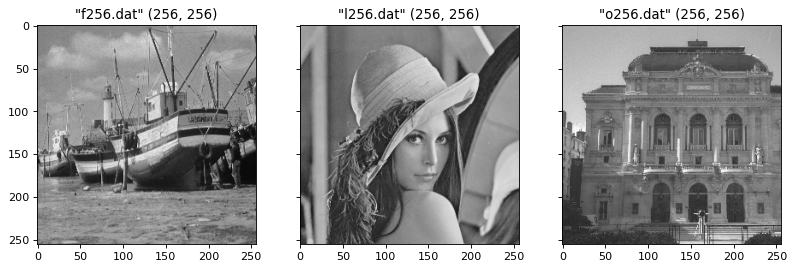

In [4]:
# Matrix dimensions
cols = 3
rows = 1

# Create figure with rows × cols subplots
fig, axs = plt.subplots(rows, cols, dpi=80, sharex=True, sharey=True)
fig.set_size_inches(4 * cols, 4.5 * rows)

# Iterate for all images
for idx, image_dict in enumerate(images):
    filename = image_dict['filename']
    image = image_dict['orig']

    # Set subplot title as '"filename" (rows, cols)' 
    axs[idx].set_title('"{}" {}'.format(
        filename + ext_inp,
        image.shape
    ))
    # Add subplot to figure plot buffer
    axs[idx].imshow(
        image,
        cmap='gray',
        vmin=0,
        vmax=255
    )

    # Save original image as .bmp file
    plt.imsave(
        path_out_orig + ext_out[1:] + '/' + filename + ext_out,
        image,
        cmap='gray',
        vmin=0,
        vmax=255
    )

# Hide x labels and tick labels for top plots and y ticks for right plots
for ax in axs.flat:
    ax.label_outer()

# Display the figure
plt.show()

## Additive Noise Corruption

In [5]:
def add_noise(image, p: int, q: int):
    height, width = image.shape

    n_pixels = height * width
    n_p = (n_pixels * p) // 100
    pixels = set()
    for i in range(n_p):
        while True:
            curr = random.randint(0, n_pixels - 1)
            row = curr // width
            col = curr % width
            if (row, col) not in pixels:
                pixels.add((row, col))
                break

    noisy_image = np.zeros((height, width))

    def min(a, b):
        return a if a < b else b

    for i in range(height):
        for j in range(width):
            noisy_image[i][j] = image[i][j]

    for row, col in pixels:
        noisy_image[row][col] = min(
            255,
            int(noisy_image[row][col]) + int(image[row][col] * (random.randint(0, q) / 100))
        )
            
    noisy_image = noisy_image.astype('uint8')

    return noisy_image

## Image Averaging

In [6]:
def average_images(images):
    height, width = images[0].shape
    img = np.zeros((height, width))

    for i in range(height):
        for j in range(width):
            sum = 0
            for k in range(len(images)):
                sum += images[k][i][j]
            img[i][j] = sum // len(images)
    img.astype('uint8')

    return img

## Image Difference

In [7]:
def difference_image(image_a, image_b):
    return abs(image_a - image_b)

def difference_image_signum(image_a, image_b):
    height, width = image_a.shape
    img = np.zeros((height, width))

    for i in range(height):
        for j in range(width):
            img[i][j] = 0 if image_a[i][j] == image_b[i][j] else 255
    img.astype('uint8')

    return img

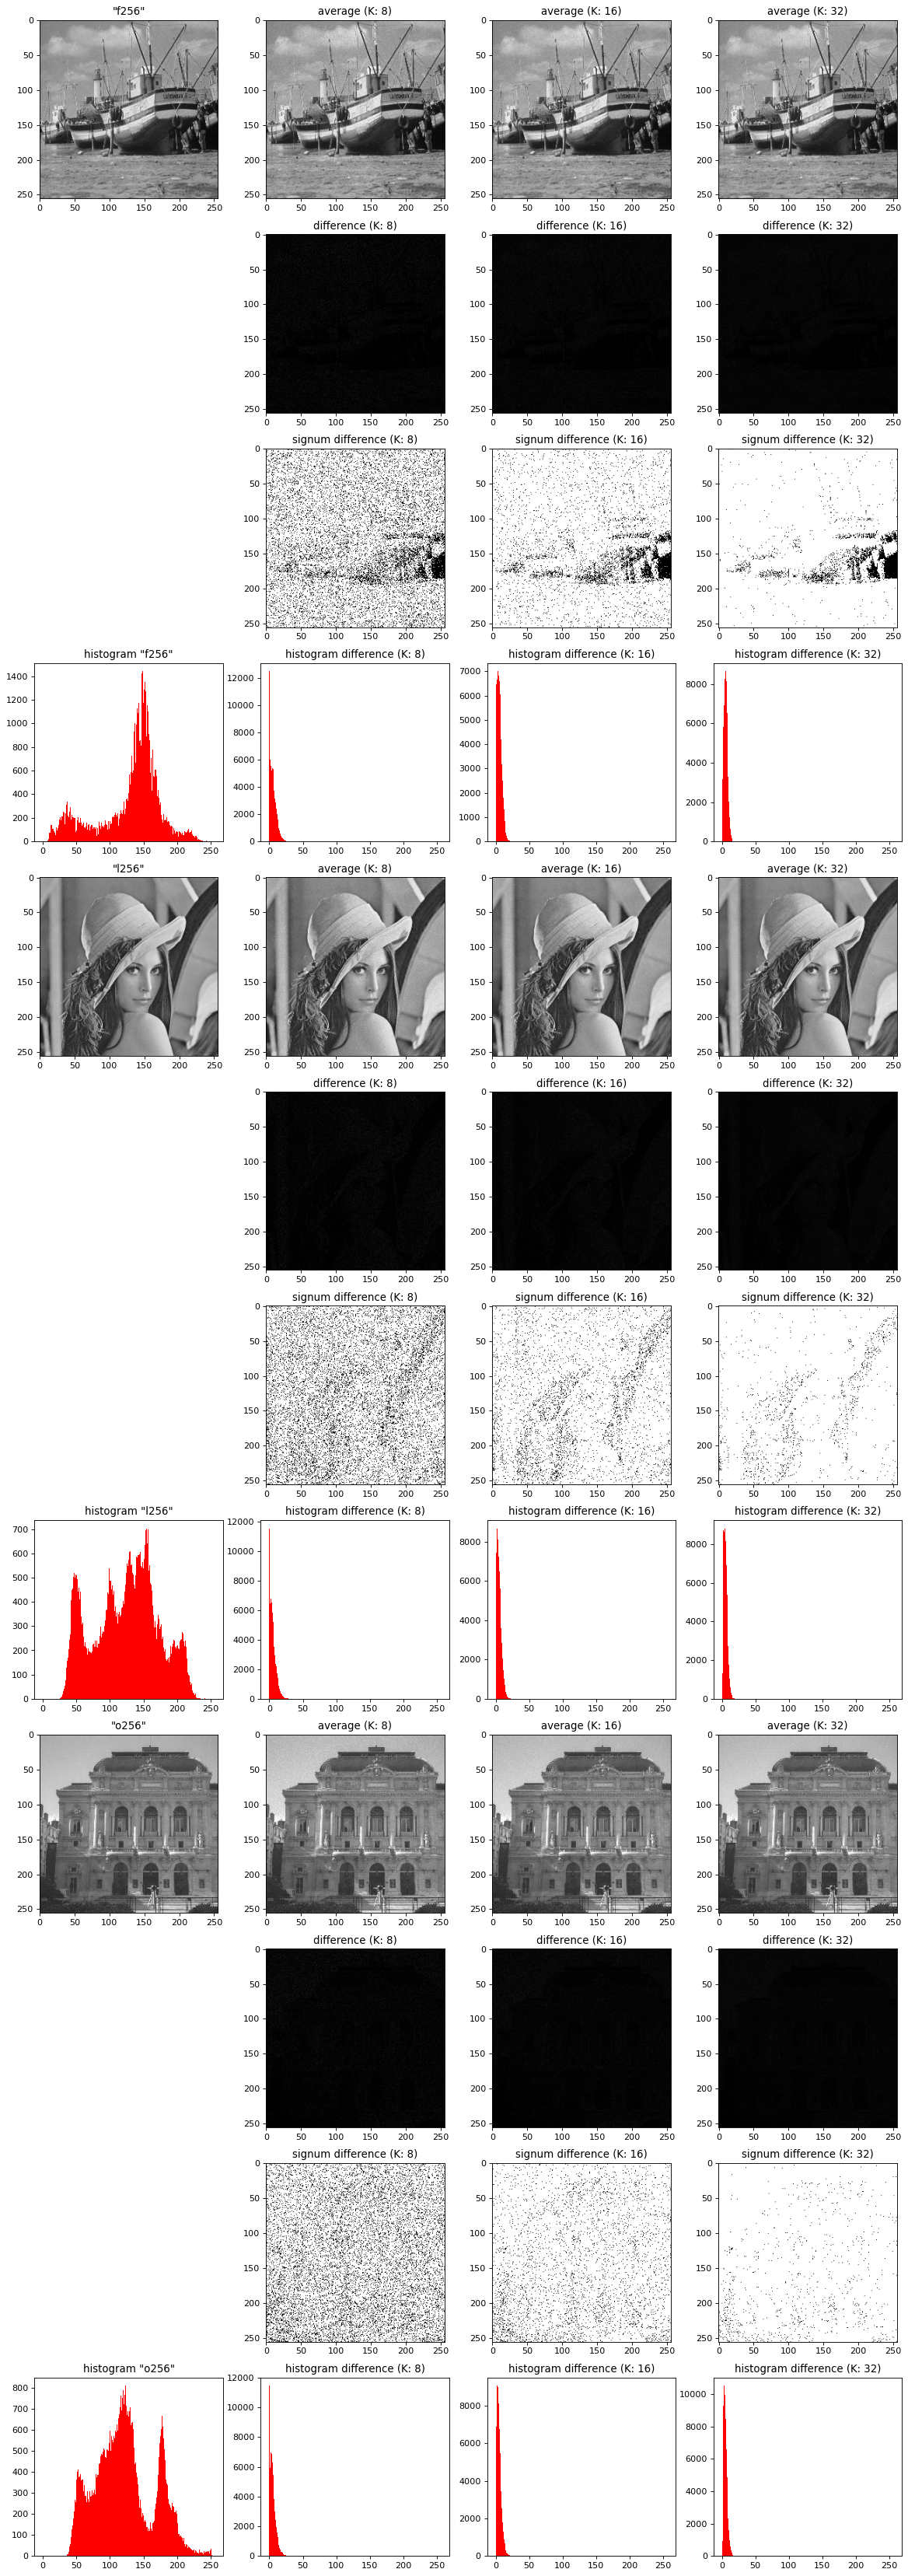

In [8]:
rows, cols = 4 * len(images), 4

# Create figure with rows × cols subplots
fig, axs = plt.subplots(rows, cols, dpi=80)
fig.set_size_inches(4.5 * cols, 4.5 * rows)

# Iterate for all images
for idx, image_dict in enumerate(images):
    filename = image_dict['filename']

    orig = image_dict['orig']
    noisy = []
    for i in range(32):
        noisy.append(add_noise(orig, 25, 35))

    g = [8, 16, 32]
    avgs = list(map(lambda x: average_images(noisy[:x]), g))
    diff = list(map(lambda x: difference_image(x, orig), avgs))
    diff_s = list(map(lambda x: difference_image_signum(x, orig), avgs))

    axs[4 * idx, 0].set_title('"{}"'.format(filename))
    axs[4 * idx, 0].imshow(orig, cmap='gray', vmin=0, vmax=255)

    axs[4 * idx + 1, 0].spines['bottom'].set_color('white')
    axs[4 * idx + 1, 0].spines['top'].set_color('white')
    axs[4 * idx + 1, 0].spines['left'].set_color('white')
    axs[4 * idx + 1, 0].spines['right'].set_color('white')
    axs[4 * idx + 1, 0].tick_params(axis='x', colors='white')
    axs[4 * idx + 1, 0].tick_params(axis='y', colors='white')

    axs[4 * idx + 2, 0].spines['bottom'].set_color('white')
    axs[4 * idx + 2, 0].spines['top'].set_color('white')
    axs[4 * idx + 2, 0].spines['left'].set_color('white')
    axs[4 * idx + 2, 0].spines['right'].set_color('white')
    axs[4 * idx + 2, 0].tick_params(axis='x', colors='white')
    axs[4 * idx + 2, 0].tick_params(axis='y', colors='white')
        
    axs[4 * idx + 3, 0].set_title(f'histogram "{filename}"')
    axs[4 * idx + 3, 0].hist(orig.flatten(), 256, [0, 256], color = 'r')
    
    for (i, item) in enumerate(avgs):
        axs[4 * idx, i + 1].set_title(f'average (K: {g[i]})')
        axs[4 * idx, i + 1].imshow(item, cmap='gray', vmin=0, vmax=255)

        axs[4 * idx + 1, i + 1].set_title(f'difference (K: {g[i]})')
        axs[4 * idx + 1, i + 1].imshow(diff[i], cmap='gray', vmin=0, vmax=255)

        axs[4 * idx + 2, i + 1].set_title(f'signum difference (K: {g[i]})')
        axs[4 * idx + 2, i + 1].imshow(diff_s[i], cmap='gray', vmin=0, vmax=255)
        
        axs[4 * idx + 3, i + 1].set_title(f'histogram difference (K: {g[i]})')
        axs[4 * idx + 3, i + 1].hist(diff[i].flatten(), 256, [0, 256], color = 'r')

        # Save pixel values of original image's histogram as a 2D matrix in a .dat file
        np.savetxt(
            path_out_conv + ext_inp[1:] + '/' + filename + f'_avg_{g[i]}' + ext_inp,
            item,
            fmt=' %d',
            newline=' \n'
        )
 
        # Save noisy image as .bmp file
        plt.imsave(
            path_out_conv + ext_out[1:] + '/' + filename + f'_avg_{g[i]}' + ext_out,
            item,
            cmap='gray',
            vmin=0,
            vmax=255
        )

        # Save pixel values of original image's histogram as a 2D matrix in a .dat file
        np.savetxt(
            path_out_conv + ext_inp[1:] + '/' + filename + f'_diff_{g[i]}' + ext_inp,
            diff[i],
            fmt=' %d',
            newline=' \n'
        )
 
        # Save noisy image as .bmp file
        plt.imsave(
            path_out_conv + ext_out[1:] + '/' + filename + f'_avg_{g[i]}' + ext_out,
            diff[i],
            cmap='gray',
            vmin=0,
            vmax=255
        )

# Save and display the figure
plt.savefig('noise_average.jpg')
plt.show()